Consider the “Academic performance” dataset of students (Academic_Performance_Dataset.csv) and perform the 
following operations using Python. 
a) Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any 
of the suitable techniques to deal with them. 
b) Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. 
c) Apply data transformations on categorical variables to convert it into numerical variables. 
Reason and document your approach properly. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Academic_Performance.csv')
df

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,SB11201420568705,M,Yes,Yes,ACADEMIC,MECHATRONICS ENGINEERING,88.0,71.0,86.0,87.0,65.0,88,FIRST CLASS
12407,SB11201420573045,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,46.0,39.0,44.0,11.0,0.0,4,FIRST CLASS
12408,SB11201420578809,M,Yes,No,ACADEMIC,INDUSTRIAL ENGINEERING,98.0,88.0,90.0,81.0,87.0,95,FIRST CLASS
12409,SB11201420578812,F,Yes,Yes,ACADEMIC,NaN,60.0,80.0,51.0,8.0,42.0,50,FIRST CLASS


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STUDENT_ID          12411 non-null  object 
 1   GENDER              12389 non-null  object 
 2   PLACEMENT           12396 non-null  object 
 3   HONOR_OPTED_OR_NOT  12397 non-null  object 
 4   EDUCATION_TYPE      12396 non-null  object 
 5   ACADEMIC_PROGRAM    12377 non-null  object 
 6   COURSE 1 MARKS      12400 non-null  float64
 7   COURSE 2 MARKS      12403 non-null  float64
 8   COURSE 3 MARKS      12397 non-null  float64
 9   COURSE 4 MARKS      12397 non-null  float64
 10  COURSE 5 MARKS      12389 non-null  float64
 11  PERCENTILE          12411 non-null  int64  
 12  OVEARLL_GRADE       12411 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

## Handling Null Values

#### GENDER

In [5]:
data = df.copy()
data["GENDER"].fillna("Not Mentioned",inplace = True)

In [6]:
data["GENDER"].isnull().sum()

0

#### PLACEMENT

In [7]:
data["PLACEMENT"].fillna("Not Mentioned",inplace=True)

In [8]:
data["PLACEMENT"].isnull().sum()

0

In [9]:
data2 = df.copy()

In [10]:
data2["GENDER"].fillna(df["GENDER"].mode()[0],inplace=True)

In [11]:
data2["GENDER"].isnull().sum()

0

In [12]:
## Also for nyumeriacal:

In [13]:
data3 = data2.copy()

In [14]:
data3["COURSE 1 MARKS"].fillna(df["COURSE 1 MARKS"].mean(),inplace = True)

In [15]:
data3["COURSE 1 MARKS"].isnull().sum()

0

In [16]:
## INstead of working on each column separately we can have one single function

In [17]:
def handlenull(df):
    for col in df.columns:
        if df[col].isnull().sum() >0:
            if df[col].dtype == 'O':
                df[col].fillna(df[col].mode(0)[0],inplace = True)
            elif df[col].dtype !='O':
                df[col].fillna(df[col].mean(),inplace=True)
    print("Handled null values")
    print("Null values ->")
    print(df.isnull().sum())

handlenull(df)

Handled null values
Null values ->
STUDENT_ID            0
GENDER                0
PLACEMENT             0
HONOR_OPTED_OR_NOT    0
EDUCATION_TYPE        0
ACADEMIC_PROGRAM      0
COURSE 1 MARKS        0
COURSE 2 MARKS        0
COURSE 3 MARKS        0
COURSE 4 MARKS        0
COURSE 5 MARKS        0
PERCENTILE            0
OVEARLL_GRADE         0
dtype: int64


## Drop column if not necessary

In [18]:
df.drop("STUDENT_ID",axis=1,inplace = True)

In [19]:
df.columns

Index(['GENDER', 'PLACEMENT', 'HONOR_OPTED_OR_NOT', 'EDUCATION_TYPE',
       'ACADEMIC_PROGRAM', 'COURSE 1 MARKS', 'COURSE 2 MARKS',
       'COURSE 3 MARKS', 'COURSE 4 MARKS', 'COURSE 5 MARKS', 'PERCENTILE',
       'OVEARLL_GRADE'],
      dtype='object')

In [20]:
df["COURSE 1 MARKS"].dtype

dtype('float64')

In [21]:
def replaceFloat(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype(int)
    print("Successfull")

replaceFloat(df)

Successfull


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   GENDER              12411 non-null  object
 1   PLACEMENT           12411 non-null  object
 2   HONOR_OPTED_OR_NOT  12411 non-null  object
 3   EDUCATION_TYPE      12411 non-null  object
 4   ACADEMIC_PROGRAM    12411 non-null  object
 5   COURSE 1 MARKS      12411 non-null  int32 
 6   COURSE 2 MARKS      12411 non-null  int32 
 7   COURSE 3 MARKS      12411 non-null  int32 
 8   COURSE 4 MARKS      12411 non-null  int32 
 9   COURSE 5 MARKS      12411 non-null  int32 
 10  PERCENTILE          12411 non-null  int64 
 11  OVEARLL_GRADE       12411 non-null  object
dtypes: int32(5), int64(1), object(6)
memory usage: 921.3+ KB


## BOXPLOT

<AxesSubplot: >

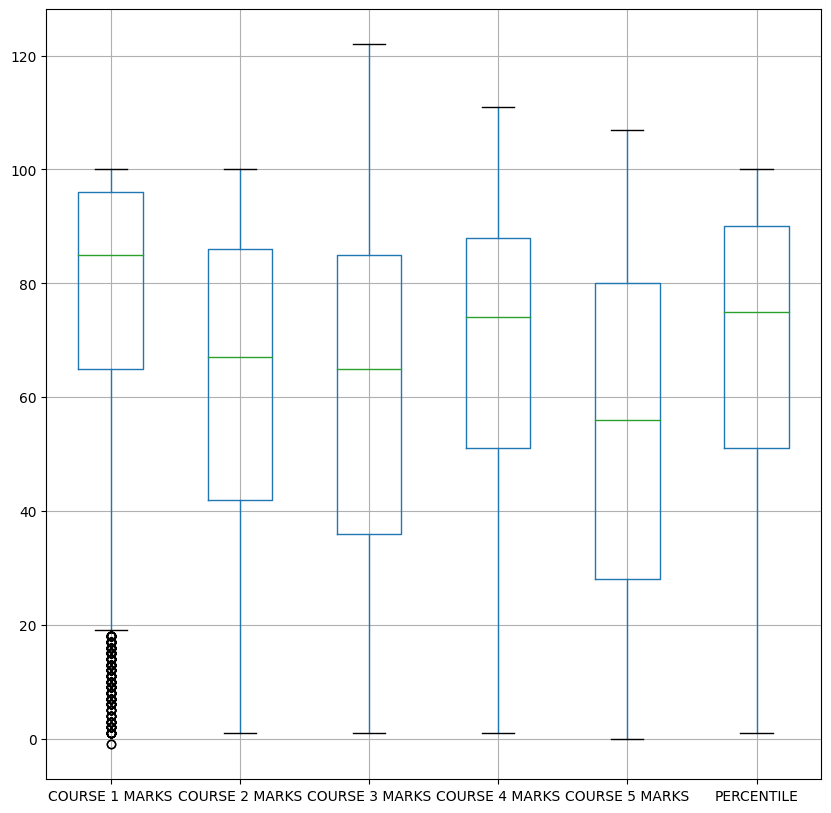

In [23]:
df.boxplot(figsize=(10,10))

In [24]:
# sns.stripplot(x=df["PLACEMENT"], y=df["COURSE 1 MARKS"] ,data=df)

In [25]:
Q1 = df["COURSE 1 MARKS"] .quantile(0.25)
Q3 = df["COURSE 1 MARKS"].quantile(0.75)
IQR = Q3-Q1
lb= Q1 - 1.5*IQR
ub = Q3 - 1.5*IQR

In [26]:
# df["COURSE 1 MARKS"] = np.where((df["COURSE 1 MARKS"]<lb) | (df["COURSE 1 MARKS"]>ub),df["COURSE 1 MARKS"].median(),df["COURSE 1 MARKS"])

<AxesSubplot: >

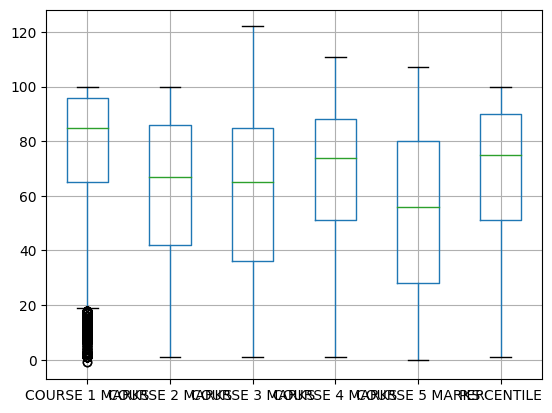

In [27]:
df.boxplot()

In [28]:
outlier_indices = df[(df['COURSE 1 MARKS'] < lb) | (df['COURSE 1 MARKS'] > ub)].index

In [29]:
outlier_indices

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       12400, 12401, 12402, 12403, 12404, 12405, 12406, 12408, 12409, 12410],
      dtype='int64', length=11004)

In [30]:
# df_no_outliers = df.replace(to_replace=outlier_indices,value=df["COURSE 1 MARKS"].median(),inplace=True)

In [31]:
data = df.copy()

In [32]:
from sklearn.compose import ColumnTransformer

In [33]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [34]:
df.columns

Index(['GENDER', 'PLACEMENT', 'HONOR_OPTED_OR_NOT', 'EDUCATION_TYPE',
       'ACADEMIC_PROGRAM', 'COURSE 1 MARKS', 'COURSE 2 MARKS',
       'COURSE 3 MARKS', 'COURSE 4 MARKS', 'COURSE 5 MARKS', 'PERCENTILE',
       'OVEARLL_GRADE'],
      dtype='object')

In [37]:
ct = ColumnTransformer(transformers=[
        (
            'trf1',
            OneHotEncoder(sparse_output=False,drop='first'),
            ['GENDER','PLACEMENT','HONOR_OPTED_OR_NOT','EDUCATION_TYPE','ACADEMIC_PROGRAM']
        ),
        (
            'trf2',
            OrdinalEncoder(categories=[['FIRST CLASS', 'SECOND CLASS','THIRD CLASS','DISTINCTION']]),
            ['OVEARLL_GRADE']
        )
    ], remainder = 'passthrough'
)

In [39]:
df2 = pd.DataFrame(ct.fit_transform(df),columns=ct.get_feature_names_out())

In [40]:
ct.get_feature_names_out()

array(['trf1__GENDER_M', 'trf1__PLACEMENT_Yes',
       'trf1__HONOR_OPTED_OR_NOT_Yes', 'trf1__EDUCATION_TYPE_Not apply',
       'trf1__EDUCATION_TYPE_TECHNICAL',
       'trf1__EDUCATION_TYPE_TECHNICAL/ACADEMIC',
       'trf1__ACADEMIC_PROGRAM_AUTOMATION ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_CATASTRAL ENGINEERING AND GEODESY',
       'trf1__ACADEMIC_PROGRAM_CHEMICAL ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_CIVIL CONSTRUCTIONS',
       'trf1__ACADEMIC_PROGRAM_CIVIL ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_CONTROL ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_ELECTRIC ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_ELECTRIC ENGINEERING AND TELECOMMUNICATIONS',
       'trf1__ACADEMIC_PROGRAM_ELECTROMECHANICAL ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_ELECTRONIC ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_INDUSTRIAL AUTOMATIC ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_INDUSTRIAL CONTROL AND AUTOMATION ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_INDUSTRIAL ENGINEERING',
   

In [41]:
df2

,trf1__GENDER_M,trf1__PLACEMENT_Yes,trf1__HONOR_OPTED_OR_NOT_Yes,trf1__EDUCATION_TYPE_Not apply,trf1__EDUCATION_TYPE_TECHNICAL,trf1__EDUCATION_TYPE_TECHNICAL/ACADEMIC,trf1__ACADEMIC_PROGRAM_AUTOMATION ENGINEERING,trf1__ACADEMIC_PROGRAM_CATASTRAL ENGINEERING AND GEODESY,trf1__ACADEMIC_PROGRAM_CHEMICAL ENGINEERING,trf1__ACADEMIC_PROGRAM_CIVIL CONSTRUCTIONS,...,trf1__ACADEMIC_PROGRAM_TEXTILE ENGINEERING,trf1__ACADEMIC_PROGRAM_TOPOGRAPHIC ENGINEERY,trf1__ACADEMIC_PROGRAM_TRANSPORTATION AND ROAD ENGINEERING,trf2__OVEARLL_GRADE,remainder__COURSE 1 MARKS,remainder__COURSE 2 MARKS,remainder__COURSE 3 MARKS,remainder__COURSE 4 MARKS,remainder__COURSE 5 MARKS,remainder__PERCENTILE
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,71.0,93.0,71.0,93.0,79.0,91.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,97.0,38.0,86.0,98.0,78.0,92.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,17.0,1.0,18.0,43.0,22.0,7.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,65.0,35.0,76.0,80.0,48.0,67.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,94.0,94.0,98.0,100.0,71.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,88.0,71.0,86.0,87.0,65.0,88.0
12407,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,46.0,39.0,44.0,11.0,0.0,4.0
12408,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,98.0,88.0,90.0,81.0,87.0,95.0
12409,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,80.0,51.0,8.0,42.0,50.0


In [42]:
df2.columns

Index(['trf1__GENDER_M', 'trf1__PLACEMENT_Yes', 'trf1__HONOR_OPTED_OR_NOT_Yes',
       'trf1__EDUCATION_TYPE_Not apply', 'trf1__EDUCATION_TYPE_TECHNICAL',
       'trf1__EDUCATION_TYPE_TECHNICAL/ACADEMIC',
       'trf1__ACADEMIC_PROGRAM_AUTOMATION ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_CATASTRAL ENGINEERING AND GEODESY',
       'trf1__ACADEMIC_PROGRAM_CHEMICAL ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_CIVIL CONSTRUCTIONS',
       'trf1__ACADEMIC_PROGRAM_CIVIL ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_CONTROL ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_ELECTRIC ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_ELECTRIC ENGINEERING AND TELECOMMUNICATIONS',
       'trf1__ACADEMIC_PROGRAM_ELECTROMECHANICAL ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_ELECTRONIC ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_INDUSTRIAL AUTOMATIC ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_INDUSTRIAL CONTROL AND AUTOMATION ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_INDUSTRIAL ENGINEERING',
       'tr

In [45]:
df["OVEARLL_GRADE"]

0        FIRST CLASS
1        THIRD CLASS
2        DISTINCTION
3        FIRST CLASS
4        FIRST CLASS
            ...     
12406    FIRST CLASS
12407    FIRST CLASS
12408    FIRST CLASS
12409    FIRST CLASS
12410    THIRD CLASS
Name: OVEARLL_GRADE, Length: 12411, dtype: object

In [47]:
df2["trf2__OVEARLL_GRADE"]

0        0.0
1        2.0
2        3.0
3        0.0
4        0.0
        ... 
12406    0.0
12407    0.0
12408    0.0
12409    0.0
12410    2.0
Name: trf2__OVEARLL_GRADE, Length: 12411, dtype: float64